# Install required packages


In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install ultralytics


Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 50.2 MB/s eta 0:00:00


# Install required packages


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import necessary libraries

In [4]:

import torch
from ultralytics import YOLO, checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Perform compatibility checks and Loading model

In [5]:

checks()


model = YOLO("yolo11n-seg.pt")


Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/112.6 GB disk)


100%|██████████| 5.90M/5.90M [00:00<00:00, 404MB/s]


# Training the model with augmentation to increase dataset size

In [6]:

train_results = model.train(
    data="/content/data.yaml",  # path to dataset YAML
    epochs=20,                  # number of training epochs
    imgsz=640,                  # training image size
    device=0,                   # device to run on (set to "0" for the first GPU)
    augment=True,               # use data augmentation
    mixup=0.2,                  # apply mixup
    mosaic=1.0,                 # apply mosaic augmentation
    degrees=10,                 # rotate +/- 10 degrees
    translate=0.1,              # translate +/- 10%
    scale=0.5,                  # scale +/- 50%
    shear=2.0,                  # shear +/- 2 degrees
    flipud=0.5,                 # 50% probability of flipping up-down
    fliplr=0.5,                 # 50% probability of flipping left-right
    hsv_h=0.015,                # adjust hue
    hsv_s=0.4,                  # adjust saturation
    hsv_v=0.4,                  # adjust value
    perspective=0.0001          # apply random perspective
)

Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 138MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 375MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/BRAIN-TUMOR/train/labels.cache... 583 images, 5 backgrounds, 0 corrupt: 100%|██████████| 586/586 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/BRAIN-TUMOR/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.08G      1.328      2.874      2.772      1.414         28        640: 100%|██████████| 37/37 [02:56<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        123        126      0.976      0.316      0.743      0.491      0.833       0.27      0.555      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.04G      1.256      2.415      1.951      1.358         14        640: 100%|██████████| 37/37 [00:18<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        123        126      0.763      0.683      0.771      0.503        0.6      0.429      0.422      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.02G      1.321       2.42       1.87      1.387         25        640: 100%|██████████| 37/37 [00:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        123        126      0.214      0.421      0.164     0.0892      0.229      0.437      0.166     0.0598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.99G      1.337      2.459      1.773      1.402         13        640: 100%|██████████| 37/37 [00:18<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        123        126      0.657      0.508      0.571      0.323      0.689      0.492      0.573      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20       3.1G      1.252      2.309      1.563      1.349         18        640: 100%|██████████| 37/37 [00:19<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        123        126      0.861      0.778      0.858      0.559      0.843      0.762      0.828      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.02G       1.27      2.275      1.404      1.356         21        640: 100%|██████████| 37/37 [00:18<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        123        126      0.869      0.873       0.91       0.61      0.873      0.817      0.869      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.06G      1.235      2.226      1.369       1.33         17        640: 100%|██████████| 37/37 [00:18<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        123        126      0.898      0.835      0.913      0.645      0.898      0.835      0.913      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.99G      1.265       2.26      1.299      1.341         24        640: 100%|██████████| 37/37 [00:18<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        123        126      0.977      0.913      0.972      0.711      0.959      0.897      0.952      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.05G      1.178      2.158      1.233      1.302         26        640: 100%|██████████| 37/37 [00:19<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        123        126      0.881      0.819      0.917      0.617      0.881      0.819      0.919      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.05G      1.168       2.07      1.207      1.273         25        640: 100%|██████████| 37/37 [00:18<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        123        126      0.874      0.937      0.948      0.703      0.874      0.937      0.947      0.626


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.97G     0.9135      1.558     0.9122      1.136         10        640: 100%|██████████| 37/37 [00:19<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        123        126      0.932      0.897       0.95      0.695      0.932      0.897      0.948       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.96G     0.8997      1.492     0.7826       1.15         10        640: 100%|██████████| 37/37 [00:17<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        123        126       0.99      0.937      0.973      0.744       0.99      0.937      0.959      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.96G     0.9064      1.484     0.7408      1.137         12        640: 100%|██████████| 37/37 [00:16<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        123        126      0.975      0.944      0.984      0.706      0.946      0.969      0.985      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.97G      0.899      1.428     0.6704      1.134         11        640: 100%|██████████| 37/37 [00:16<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        126      0.991      0.984      0.985      0.756      0.991      0.984      0.985      0.742



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.97G     0.8684      1.369     0.6394      1.128         10        640: 100%|██████████| 37/37 [00:16<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        123        126      0.951      0.984      0.985      0.759      0.951      0.984      0.985      0.744



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.96G     0.8303      1.388     0.6197      1.103         10        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        123        126      0.978      0.968       0.99      0.764      0.978      0.968       0.99      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.96G      0.844      1.344     0.5826      1.122         10        640: 100%|██████████| 37/37 [00:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

                   all        123        126      0.989      0.968      0.991      0.782      0.989      0.968      0.991      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.97G     0.7846       1.27     0.5366      1.085         10        640: 100%|██████████| 37/37 [00:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        123        126      0.971      0.984      0.993      0.778      0.971      0.984      0.993      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.97G     0.7805       1.27      0.526      1.051         10        640: 100%|██████████| 37/37 [00:16<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        123        126      0.984      0.982      0.992      0.778      0.984      0.982      0.992      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.95G     0.7575      1.239     0.5006      1.055         12        640: 100%|██████████| 37/37 [00:16<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        123        126      0.982      0.984      0.992      0.797      0.982      0.984      0.992      0.768



20 epochs completed in 0.165 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.15 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:00<00:01,  2.57it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:01<00:01,  1.46it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:03<00:01,  1.59s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


                   all        123        126      0.982      0.984      0.992      0.797      0.982      0.984      0.992      0.767
Speed: 1.0ms preprocess, 4.0ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/segment/train


# Loading the trained model

In [8]:
model = YOLO('/content/runs/segment/train/weights/best.pt')

# Runing inference on the image



image 1/1 /content/test.jpg: 640x640 1 tumor, 20.5ms
Speed: 3.5ms preprocess, 20.5ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


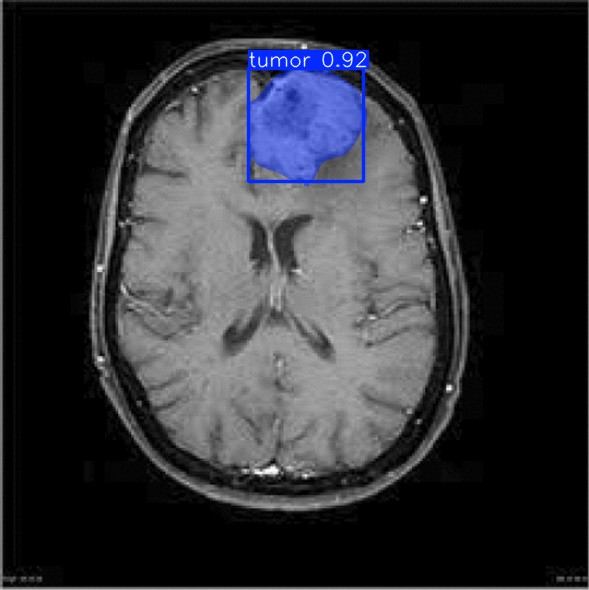

In [11]:
results = model('test.jpg')

# Show the results
results[0].show()